https://www.sciencedirect.com/science/article/pii/003132039190081F
http://www.lps.usp.br/hae/apostila/convkeras-ead.pdf
http://yann.lecun.com/exdb/mnist/

# **Importação de bibliotecas**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# **Importação e transformação dos dados**

In [ ]:
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()

Xtrain, Xtest = Xtrain / 255.0, Xtest / 255.0 #Normalização das imagens
Xtrain, Xtest = np.expand_dims(Xtrain,axis=3), np.expand_dims(Xtest,axis=3) #Readequação de dimensionalidade

Xtrain = Xtrain
Xtest = Xtest
Ytrain = Ytrain
Ytest = Ytest

print('\tTraining set shape: ', Xtrain.shape)
print('\tTesting set shape: ', Xtest.shape)

	Training set shape:  (60000, 28, 28, 1)
	Testing set shape:  (10000, 28, 28, 1)


# **Modelo da rede neural convolucional**

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax'),
    ]
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

# **Treinamento**

In [ ]:
history = model.fit(Xtrain, Ytrain, epochs=10, validation_data=(Xtest, Ytest))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 99s 52ms/step - loss: 0.1757 - accuracy: 0.9459 - val_loss: 0.0400 - val_accuracy: 0.9868
Epoch 2/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0570 - accuracy: 0.9828 - val_loss: 0.0301 - val_accuracy: 0.9903
Epoch 3/10
1875/1875 [==============================] - 93s 49ms/step - loss: 0.0416 - accuracy: 0.9873 - val_loss: 0.0335 - val_accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0331 - accuracy: 0.9901 - val_loss: 0.0296 - val_accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0348 - val_accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0218 - accuracy: 0.9936 - val_loss: 0.0301 - val_accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.0283 - val_accura

# **Métricas da rede**

Evaluate model on test data
79/79 [==============================] - 6s 77ms/step - loss: 0.0320 - accuracy: 0.9917
test loss, test acc: [0.032006893306970596, 0.9916999936103821]


Text(0.5, 0, 'Epochs')

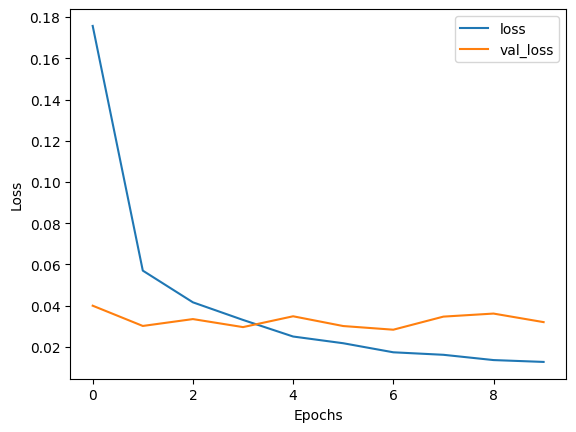

In [ ]:
print("Evaluate model on test data")
results = model.evaluate(Xtest, Ytest, batch_size=128)
print("test loss, test acc:", results)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend(['loss','val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')

# plt.plot(history.history['accuracy'], label="accuracy")
# plt.plot(history.history['val_accuracy'], label="val_accuracy")
# plt.legend(['accuracy','val_accuracy'])
# plt.ylabel('Accuracy')
# plt.xlabel('Epochs')

# plt.show()

# **Salvando o modelo**

In [ ]:
model.save('DigitsCNN')

# **Carregando o modelo pré treinado**

In [ ]:
# model = tf.keras.models.load_model('DigitsCNN')

# **Função que prepara a imagem dada pelo usuário para predição**

In [ ]:
def image_preprocess(image):
  image = image[:,:,0]*0.2989 + image[:,:,1]*0.5870 + image[:,:,2]*0.1140
  image = image / 255.0
  image = np.array(image)
  image = np.expand_dims(image,axis=0)

  return image

# **Detecção de dígitos manuscritos**

1/1 [==============================] - 0s 127ms/step
100.00% de chance de ser: 3
0.00% de chance de ser: 9
0.00% de chance de ser: 2


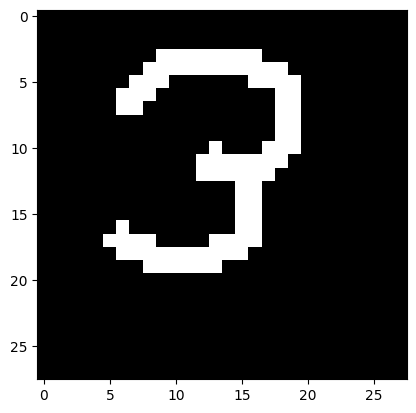

In [ ]:
import imageio.v2 as imageio

image_path = 'tres.png' #Insira aqui o caminho da imagem(ela deve ter fundo preto e o número escrito em branco e deve ser 28x28)
image = imageio.imread(image_path)
preprocessed_image = image_preprocess(image)

prediction = model.predict(preprocessed_image)[0]
best = prediction.argsort()[-3:][::-1]
print("{:.2%} de chance de ser: {}".format(prediction[best[0]], best[0]))
print("{:.2%} de chance de ser: {}".format(prediction[best[1]], best[1]))
print("{:.2%} de chance de ser: {}".format(prediction[best[2]], best[2]))

plt.imshow(image, cmap="gray")
plt.show()